In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/content/drive/MyDrive/데청캠 프로젝트/dataset/시군구별_인프라수_청년수.csv'
df = pd.read_csv(path, encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)

In [11]:
#!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

In [5]:
# items = df.columns.tolist()[2:]
# items

In [6]:
#탐색적 요인분석
# fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
# fa.fit(df[items])

In [7]:
# efa_result= pd.DataFrame(fa.loadings_, index=items)
# df_get = fa.get_factor_variance()
# df_get

In [8]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,533 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [10]:
# plt.figure(figsize=(6,10))
# sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
# for key, value in factors_items_dict.items():
#     print(key)
#     print(CronbachAlpha(df[value]))
#     print()

In [6]:
df_set = df.drop(['시군구','청년인구'], axis=1)
df_set = df_set.astype('float64')
df_set

,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널
0,496.0,28.0,3.0,60.0,0.0,1.0,23.0,5730.0,24.0,201.0,0.0,19.0,0.0,367.0,0.0
1,572.0,16.0,2.0,48.0,0.0,1.0,17.0,5383.0,62.0,281.0,1.0,18.0,0.0,77.0,0.0
2,319.0,19.0,1.0,47.0,0.0,1.0,9.0,5056.0,23.0,104.0,9.0,18.0,1.0,48.0,0.0
3,457.0,21.0,2.0,69.0,0.0,1.0,10.0,4562.0,22.0,62.0,3.0,19.0,0.0,31.0,0.0
4,558.0,76.0,3.0,76.0,0.0,1.0,12.0,5609.0,26.0,66.0,0.0,17.0,0.0,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,618.0,24.0,1.0,106.0,0.0,1.0,6.0,7460.0,16.0,244.0,4.0,16.0,2.0,18.0,3.0
71,174.0,18.0,1.0,60.0,0.0,1.0,5.0,3107.0,3.0,71.0,0.0,10.0,0.0,4.0,0.0
72,172.0,30.0,0.0,94.0,1.0,1.0,5.0,3492.0,11.0,52.0,2.0,9.0,0.0,9.0,0.0
73,206.0,57.0,2.0,107.0,0.0,1.0,11.0,4586.0,5.0,195.0,5.0,13.0,1.0,18.0,1.0


In [8]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_set)
chi_square_value, p_value

(531.0783976056026, 1.4851949509729739e-58)

In [9]:
# Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_set)
kmo_model

0.6002067062296267

In [12]:
fa = FactorAnalyzer(n_factors=15,rotation=None)
fa.fit(df_set)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([4.61648756, 1.70740136, 1.47775676, 1.26363492, 1.14670305,
       0.94200269, 0.86431053, 0.72825267, 0.66141703, 0.47409439,
       0.40733485, 0.28256483, 0.23496605, 0.154506  , 0.0385673 ])

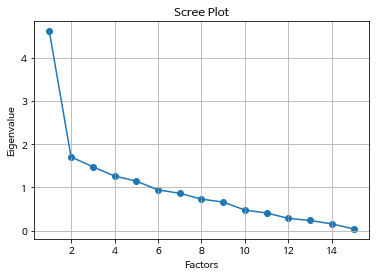

In [13]:
plt.scatter(range(1,df_set.shape[1]+1),ev)
plt.plot(range(1,df_set.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

2개?

In [14]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax") #ml : 최대우도 방법
fa.fit(df_set)
efa_result= pd.DataFrame(fa.loadings_, index=df_set.columns)
efa_result

,0,1
병원,0.756059,0.302319
사회스포츠,0.562539,-0.056143
대학교,0.252101,-0.029275
초중고,0.836164,-0.236479
공항,0.034386,-0.100316
소방서,0.321934,-0.014851
경찰서,0.519546,0.611440
소형상업시설(음식점_카페_학원_편의점),0.921468,0.239245
대형상업시설,0.503340,0.382180
숙박시설,-0.056838,0.368898


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


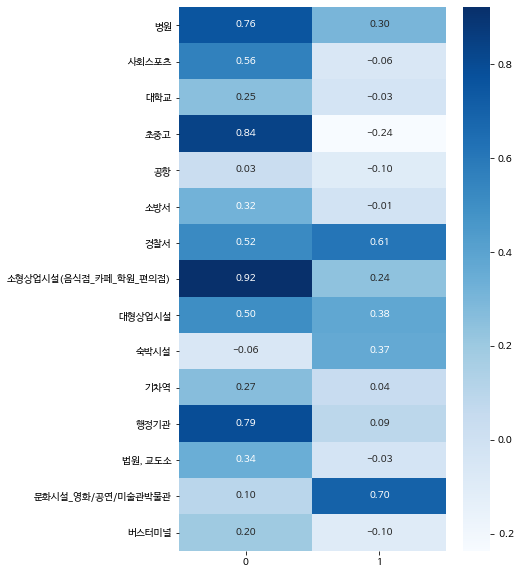

In [15]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

공항 , 버스 , 기차역, 소방서, 대학교 , 법원, 교도서 제거?


In [16]:
df.columns
# ['시군구', '청년인구',  '대학교',  '공항', '소방서', '기차역',  '법원, 교도소', '버스터미널','숙박시설']

Index(['시군구', '청년인구', '병원', '사회스포츠', '대학교', '초중고', '공항', '소방서', '경찰서',
       '소형상업시설(음식점_카페_학원_편의점)', '대형상업시설', '숙박시설', '기차역', '행정기관', '법원, 교도소',
       '문화시설_영화/공연/미술관박물관', '버스터미널'],
      dtype='object')

In [17]:
df_set = df.drop(['시군구', '청년인구',  '대학교',  '공항', '소방서', '기차역',  '법원, 교도소', '버스터미널','숙박시설'], axis=1)
df_set = df_set.astype('float64')
df_set

,병원,사회스포츠,초중고,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,행정기관,문화시설_영화/공연/미술관박물관
0,496.0,28.0,60.0,23.0,5730.0,24.0,19.0,367.0
1,572.0,16.0,48.0,17.0,5383.0,62.0,18.0,77.0
2,319.0,19.0,47.0,9.0,5056.0,23.0,18.0,48.0
3,457.0,21.0,69.0,10.0,4562.0,22.0,19.0,31.0
4,558.0,76.0,76.0,12.0,5609.0,26.0,17.0,25.0
...,...,...,...,...,...,...,...,...
70,618.0,24.0,106.0,6.0,7460.0,16.0,16.0,18.0
71,174.0,18.0,60.0,5.0,3107.0,3.0,10.0,4.0
72,172.0,30.0,94.0,5.0,3492.0,11.0,9.0,9.0
73,206.0,57.0,107.0,11.0,4586.0,5.0,13.0,18.0


In [ ]:
# Bartlett의 테스트
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_set)
chi_square_value, p_value

(394.59843818608385, 1.1359450260606526e-66)

In [ ]:
# Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_set)
kmo_model

0.6949126786486151

In [ ]:
fa = FactorAnalyzer(n_factors=8,rotation=None)
fa.fit(df_set)

#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([4.22977521, 1.38855088, 0.78994488, 0.63658919, 0.39733433,
       0.28578783, 0.21466878, 0.0573489 ])

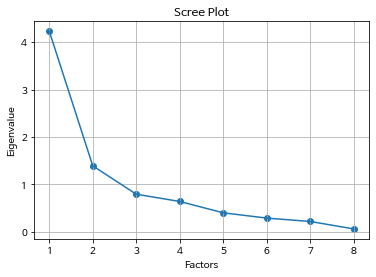

In [ ]:
plt.scatter(range(1,df_set.shape[1]+1),ev)
plt.plot(range(1,df_set.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax") #ml : 최대우도 방법
fa.fit(df_set)
efa_result= pd.DataFrame(fa.loadings_, index=df_set.columns)
efa_result

,0,1,2
병원,0.895099,0.273739,0.165820
사회스포츠,0.366723,0.415375,-0.008319
초중고,0.207706,0.981855,0.011015
경찰서,0.370342,0.300822,0.603965
소형상업시설(음식점_카페_학원_편의점),0.741633,0.531043,0.220661
대형상업시설,0.639805,0.156486,0.180005
행정기관,0.518807,0.584516,0.164060
문화시설_영화/공연/미술관박물관,0.091516,-0.096792,0.989194


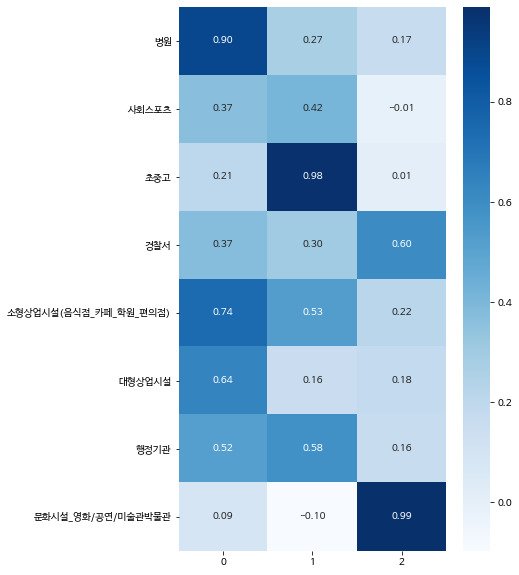

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [ ]:
%%shell
jupyter nbconvert --to html /content/FA.ipynb

[NbConvertApp] Converting notebook /content/FA.ipynb to html
[NbConvertApp] Writing 493352 bytes to /content/FA.html
